In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

from modules.categorical_data_coding import code_data
from modules.model_runer import find_n_neighbors, test_model
from modules.classes_scatterplot import draw_classes_scatterplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/10_Ca_classification.csv')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,30.67611,29.79112,29.76063,28.96724,28.63155,28.78416,29.07407,29.01298,29.98959,30.5237,...,42.41432,42.94833,42.09384,41.89555,42.71956,43.03997,43.03998,43.57399,43.2384,10Ca/0Que
1,42.62801,42.96372,42.09393,42.33814,42.90275,43.43676,42.67387,42.61278,42.27709,41.5752,...,43.13572,43.24253,43.01364,42.99835,43.62396,43.62397,43.33408,43.08999,43.1052,10Ca/0Que
2,43.53251,43.47152,43.85293,42.96794,43.60885,42.64756,42.51027,43.95978,43.24269,43.3342,...,42.46852,42.13283,42.16334,42.10235,42.42276,43.23147,43.55198,43.73509,43.3231,10Ca/0Que
3,42.95691,40.86642,40.74443,41.98034,42.31605,43.41466,43.12477,43.71988,43.39949,42.7891,...,42.67112,42.65583,43.05264,42.41175,42.10656,42.96107,42.85428,43.14419,43.9071,10Ca/0Que
4,43.90711,43.26632,43.11373,43.02214,43.11375,42.74756,43.41897,43.26638,42.82389,42.8697,...,43.40772,43.30093,43.19414,42.87375,43.45356,43.72827,42.88898,42.35499,41.6073,10Ca/0Que


In [4]:
list(df.target.unique())

['10Ca/0Que', '10Ca/10Que', '10Ca/100Que']

In [5]:
code_data(df, 'target')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,30.67611,29.79112,29.76063,28.96724,28.63155,28.78416,29.07407,29.01298,29.98959,30.5237,...,42.41432,42.94833,42.09384,41.89555,42.71956,43.03997,43.03998,43.57399,43.2384,0
1,42.62801,42.96372,42.09393,42.33814,42.90275,43.43676,42.67387,42.61278,42.27709,41.5752,...,43.13572,43.24253,43.01364,42.99835,43.62396,43.62397,43.33408,43.08999,43.1052,0
2,43.53251,43.47152,43.85293,42.96794,43.60885,42.64756,42.51027,43.95978,43.24269,43.3342,...,42.46852,42.13283,42.16334,42.10235,42.42276,43.23147,43.55198,43.73509,43.3231,0
3,42.95691,40.86642,40.74443,41.98034,42.31605,43.41466,43.12477,43.71988,43.39949,42.7891,...,42.67112,42.65583,43.05264,42.41175,42.10656,42.96107,42.85428,43.14419,43.9071,0
4,43.90711,43.26632,43.11373,43.02214,43.11375,42.74756,43.41897,43.26638,42.82389,42.8697,...,43.40772,43.30093,43.19414,42.87375,43.45356,43.72827,42.88898,42.35499,41.6073,0


# Distance-based algorithms

In [6]:
scaler = MinMaxScaler()

In [7]:
distance_based_df = scaler.fit_transform(df.values)
distance_based_df = pd.DataFrame(distance_based_df)
distance_based_df.columns = df.columns
distance_based_df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,0.605098,0.570746,0.573137,0.551146,0.540460,0.552406,0.558115,0.562753,0.590673,0.600879,...,0.912057,0.919529,0.886471,0.882240,0.905256,0.930927,0.933259,0.940946,0.925553,0.0
1,0.919468,0.921020,0.903642,0.898931,0.923209,0.940267,0.918142,0.914817,0.910407,0.889538,...,0.931248,0.927261,0.910179,0.910454,0.928494,0.946479,0.941103,0.928185,0.922090,0.0
2,0.943260,0.934523,0.950779,0.915313,0.942146,0.919376,0.913811,0.949687,0.935533,0.935482,...,0.913499,0.898096,0.888262,0.887531,0.897630,0.936026,0.946916,0.945193,0.927755,0.0
3,0.928120,0.865250,0.867478,0.889625,0.907474,0.939682,0.930079,0.943477,0.939613,0.921244,...,0.918889,0.911841,0.911184,0.895446,0.889505,0.928825,0.928305,0.929614,0.942940,0.0
4,0.953113,0.929066,0.930970,0.916723,0.928868,0.922023,0.937867,0.931737,0.924635,0.923349,...,0.938484,0.928796,0.914832,0.907266,0.924115,0.949256,0.929231,0.908807,0.883144,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,0.746133,0.750653,0.763848,0.741807,0.745236,0.757343,0.768727,0.770682,0.768704,0.734544,...,0.765328,0.758524,0.744299,0.748147,0.750982,0.753558,0.763741,0.770980,0.782929,1.0
3104,0.788829,0.768256,0.785267,0.783237,0.764626,0.778500,0.784634,0.771227,0.783944,0.800459,...,0.765482,0.765094,0.764903,0.760399,0.762109,0.771592,0.776920,0.782398,0.765227,1.0
3105,0.750053,0.763543,0.799734,0.777831,0.776652,0.785117,0.788425,0.758739,0.748359,0.766733,...,0.772131,0.750008,0.741846,0.744544,0.732463,0.739645,0.766492,0.755998,0.755461,1.0
3106,0.771878,0.758017,0.775765,0.763696,0.738749,0.746901,0.747375,0.747433,0.744143,0.754929,...,0.587596,0.610603,0.593331,0.621330,0.689483,0.717857,0.729204,0.726381,0.686975,1.0


In [8]:
X, y = np.array(distance_based_df.drop('target', axis=1)), np.array(df['target'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## k-Nearest Neighbors with Dynamic Time Warping

In [10]:
knn = KNeighborsTimeSeriesClassifier(n_neighbors=3)

In [11]:
#test_model(knn, X_train, y_train)

In [12]:
knn.fit(X_train, y_train)

KNeighborsTimeSeriesClassifier(n_neighbors=3)

In [13]:
knn_pred = knn.predict(X_test)

In [14]:
f1_score(knn_pred, y_test, average='weighted')

0.7565373102928176

In [15]:
accuracy_score(knn_pred, y_test)

0.7652733118971061

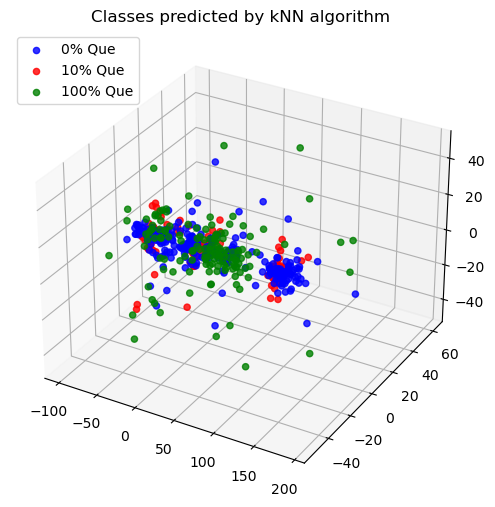

In [16]:
draw_classes_scatterplot(X_test, knn_pred, "Classes predicted by kNN algorithm", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])